

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [82]:
import pandas as pd
import numpy as np

IMPORTING THE DATASETS

In [83]:
train = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
movies = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")
test = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")

In [84]:
len(movies['movieid'].unique())

126404

In [85]:
len(train['movieid'].unique())

16812

In [86]:
len(train['movieid'][train['movieid'].duplicated()].unique())

14221

In [87]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [88]:
test.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [89]:
len(test['movieid'].unique())

16786

**Merging The Datasets (Train, Movies) on the column 'movieid**'

In [90]:
df_train = pd.merge(train,movies,on='movieid')

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieid       55315 non-null  object
 1   reviewerName  55315 non-null  object
 2   isTopCritic   55315 non-null  bool  
 3   reviewText    52805 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.3+ MB


In [93]:
df_train

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,NEGATIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
2,marvelous_pirate,Melinda Dunn,False,The stop-motion artistry of Wendell &amp; Wild...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
3,marvelous_pirate,Mr. Wayne Smith,False,Wendell &amp; Wild is narratively overstuffed ...,NEGATIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
4,marvelous_pirate,Connor Nelson,False,For being about the Netherworlds&#44; it&#8217...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525272,frodo_baggins_norman_bates_ellen_ripley_astonish,Janice Pearson,False,The broad shape of the ending is predictable; ...,NEGATIVE,Frodo Baggins Norman Bates Ellen Ripley Astonish,81.0,NaN,NaN,NaN,2019-03-19,111.0,"Crime, Drama",Filipino,Sara Maggard,NaN,NaN,NaN
525273,elegant_starlight_labyrinth_katniss_everdeen,Frank Farrell,False,A formula designed for adolescent and young ad...,POSITIVE,Elegant Starlight Labyrinth Katniss Everdeen,75.0,NaN,NaN,2018-04-13,2018-09-18,93.0,"Horror, Mystery & thriller",Korean,Frances Gagne,$111.2K,Well Go USA,NaN
525274,don_vito_corleone_neo_hannibal_lecter,Juan Taylor,False,"All these years, I've kept a soft spot in my h...",NEGATIVE,Don Vito Corleone Neo Hannibal Lecter,55.0,NaN,NaN,1987-02-20,2009-04-14,96.0,Comedy,English,Claudia Bernhard,$799.4K,NaN,NaN
525275,dorothy_gale_luke_skywalker_luke_skywalker,Robert Cardenas,False,Powerful documentary about the struggle of Wes...,POSITIVE,Dorothy Gale Luke Skywalker Luke Skywalker,75.0,NaN,NaN,2008-02-29,2009-07-14,89.0,Documentary,English,James Fanney,NaN,NaN,NaN


In [94]:
columns = df_train.columns

In [95]:
columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [96]:
train['movieid'][train['movieid'].duplicated()].value_counts()

escape_the_terminator_tyler_durden_astonish    707
fantasy_forrest_gump_intrigue                  244
james_t._kirk_marty_mcfly_astonish             185
marvelous_lara_croft_luke_skywalker            139
michael_corleone_v_marty_mcfly_tony_stark      137
                                              ... 
aurora_annie_hall                                1
rocky_balboa_oracle_john_mcclane                 1
courageous_wolverine_adventure_tyler_durden      1
escape_john_mcclane_katniss_everdeen_aurora      1
brave_ellen_ripley_rick_blaine_glimmer           1
Name: movieid, Length: 14221, dtype: int64

In [97]:
cl_train = df_train.drop(['releaseDateTheaters','releaseDateStreaming','runtimeMinutes','boxOffice','distributor','soundType','originalLanguage','reviewerName'],axis=1)

In [98]:
len(cl_train['director'].value_counts())

13038

In [99]:
cl_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525277 entries, 0 to 525276
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieid             525277 non-null  object 
 1   isFrequentReviewer  525277 non-null  bool   
 2   reviewText          501460 non-null  object 
 3   sentiment           525277 non-null  object 
 4   title               525277 non-null  object 
 5   audienceScore       224448 non-null  float64
 6   rating              134486 non-null  object 
 7   ratingContents      134486 non-null  object 
 8   genre               307944 non-null  object 
 9   director            525277 non-null  object 
dtypes: bool(1), float64(1), object(8)
memory usage: 40.6+ MB


**Creating a List of Movies having Duplicate Values**

In [100]:
duplicate_movies = list(movies['movieid'][movies['movieid'].duplicated()])

In [101]:
leng = len(duplicate_movies)

In [102]:
leng

16854

In [103]:
si = int(leng/6) #Dividing the data to lower the processing the memory and time

In [104]:
si

2809

In [105]:
duplicate_movie_1 = duplicate_movies[:si] #Creating 6 parts of duplicate movies
duplicate_movie_2 = duplicate_movies[si:2*si]
duplicate_movie_3 = duplicate_movies[2*si:3*si]
duplicate_movie_4 = duplicate_movies[3*si:4*si]
duplicate_movie_5 = duplicate_movies[4*si:5*si]
duplicate_movie_6 = duplicate_movies[5*si:6*si]

In [106]:
len(duplicate_movie_3)

2809

Updating the movies dataset by dropping unwanted features

In [107]:
movies_t = movies.drop(['releaseDateTheaters','releaseDateStreaming','runtimeMinutes','boxOffice','distributor','soundType','originalLanguage'],axis=1)

In [108]:
movies_cols = movies_t.columns

In [109]:
len(movies_cols)

7

In [110]:
movies_t.iloc[101292] 

movieid           darth_vader_dazzling_courageous_holly_golightly
title             Darth Vader Dazzling Courageous Holly Golightly
audienceScore                                                38.0
rating                                                        NaN
ratingContents                                                NaN
genre                                              Romance, Drama
director                                          Lorrie Lundborg
Name: 101292, dtype: object

In [111]:
for i in duplicate_movie_1:   #len(duplicated_movie)
#     if ep==0:
    count=[]
    c=0
    genre={}
    l = len(movies_t[movies_t['movieid']==i])
    li = movies_t[movies_t['movieid']==i].index.tolist()
#     print(l,li)
    for k in range(len(li)):
        try:
#             print(li[k],i)
            m = movies_t.iloc[li[k]]
            c=0
            min_count=[]
    #         print(m)
            if pd.isna(m[5]):
                pass
            else:
                g = list(m[5].split(", "))
    #             print(g)
                for f in range(len(g)):
                    if g[f] not in genre.keys():
                        genre[g[f]]=1
                    else:
                        genre[g[f]]+=1    
            for j in range(len(movies_cols)):
                if pd.isna(m[j]):
                    c+=1
            count.append(c)
        except:
            min_count=[]
            count.append(10)
#     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
    for s in range(len(count)):
        if count[s]==min(count):
            min_count.append((s,li[s]))
#     print(li)
    v = list(genre.values())
    k = list(genre.keys())
    if len(v)>0:
        ge = k[v.index(max(v))]
#             print(count[s])
#     print(count)        
#     print(min_count[0][1])
        if len(min_count)==1:
            li.remove(min_count[0][1])
        else:
            b=0
            for t in range(len(min_count)):
                m = movies_t.iloc[min_count[t][1]]
#                 print(m)
                if pd.isna(m[5]):
                    pass
                else:
                    if ge in m[5]:
#                         print(min_count[t][1])
                        li.remove(min_count[t][1])
                        b=1
            if b==0:
                li.remove(min_count[0][1])
#         print(li)
        movies_t = movies_t.drop(li,axis=0)
    else:
#         print(li,min_count[0][1])
        li.remove(min_count[0][1])
        movies_t = movies_t.drop(li,axis=0)
#     else:
#         count=[]
#         c=0
#         genre={}
#         l = len(movie_new[movie_new['movieid']==i])
#         li = movie_new[movie_new['movieid']==i].index.tolist()
#         print(l,li)
#         for k in range(len(li)):
              
#             m = movie_new.iloc[li[k]]
#             c=0
#             min_count=[]
#     #         print(m)
#             if pd.isna(m[5]):
#                 pass
#             else:
#                 g = list(m[5].split(", "))
#     #             print(g)
#                 for f in range(len(g)):
#                     if g[f] not in genre.keys():
#                         genre[g[f]]=1
#                     else:
#                         genre[g[f]]+=1    
#             for j in range(len(movie_col)):
#                 if pd.isna(m[j]):
#                     c+=1
#             count.append(c)
#     #     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
#         for s in range(len(count)):
#             if count[s]==min(count):
#                 min_count.append((s,li[s]))
#     #     print(li)
#         v = list(genre.values())
#         k = list(genre.keys())
#         if len(v)>0:
#             ge = k[v.index(max(v))]
#     #             print(count[s])
#     #     print(count)        
#     #     print(min_count[0][1])
#             if len(min_count)==1:
#                 li.remove(min_count[0][1])
#             else:
#                 b=0
#                 for t in range(len(min_count)):
#                     m = movie_new.iloc[min_count[t][1]]
#     #                 print(m)
#                     if pd.isna(m[5]):
#                         pass
#                     else:
#                         if ge in m[5]:
#                             print(min_count[t][1])
#                             li.remove(min_count[t][1])
#                             b=1
#                 if b==0:
#                     li.remove(min_count[0][1])
#     #         print(li)
#             movie_new = movie_new.drop(li,axis=0)
#         else:
#             li.remove(min_count[0][1])
#             movie_new = movie_new.drop(li,axis=0)
# print(count)

In [112]:
for i in duplicate_movie_2:   #len(duplicated_movie)
#     if ep==0:
    count=[]
    c=0
    genre={}
    l = len(movies_t[movies_t['movieid']==i])
    li = movies_t[movies_t['movieid']==i].index.tolist()
#     print(l,li)
    for k in range(len(li)):
        try:
#             print(li[k],i)
            m = movies_t.iloc[li[k]]
            c=0
            min_count=[]
    #         print(m)
            if pd.isna(m[5]):
                pass
            else:
                g = list(m[5].split(", "))
    #             print(g)
                for f in range(len(g)):
                    if g[f] not in genre.keys():
                        genre[g[f]]=1
                    else:
                        genre[g[f]]+=1    
            for j in range(len(movies_cols)):
                if pd.isna(m[j]):
                    c+=1
            count.append(c)
        except:
            min_count=[]
            count.append(10)
#     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
    for s in range(len(count)):
        if count[s]==min(count):
            min_count.append((s,li[s]))
#     print(li)
    v = list(genre.values())
    k = list(genre.keys())
    if len(v)>0:
        ge = k[v.index(max(v))]
#             print(count[s])
#     print(count)        
#     print(min_count[0][1])
        if len(min_count)==1:
            li.remove(min_count[0][1])
        else:
            b=0
            for t in range(len(min_count)):
                m = movies_t.iloc[min_count[t][1]]
#                 print(m)
                if pd.isna(m[5]):
                    pass
                else:
                    if ge in m[5]:
#                         print(min_count[t][1])
                        li.remove(min_count[t][1])
                        b=1
            if b==0:
                li.remove(min_count[0][1])
#         print(li)
        movies_t = movies_t.drop(li,axis=0)
    else:
#         print(li,min_count[0][1])
        li.remove(min_count[0][1])
        movies_t = movies_t.drop(li,axis=0)
#     else:
#         count=[]
#         c=0
#         genre={}
#         l = len(movie_new[movie_new['movieid']==i])
#         li = movie_new[movie_new['movieid']==i].index.tolist()
#         print(l,li)
#         for k in range(len(li)):
            
#             m = movie_new.iloc[li[k]]
#             c=0
#             min_count=[]
#     #         print(m)
#             if pd.isna(m[5]):
#                 pass
#             else:
#                 g = list(m[5].split(", "))
#     #             print(g)
#                 for f in range(len(g)):
#                     if g[f] not in genre.keys():
#                         genre[g[f]]=1
#                     else:
#                         genre[g[f]]+=1    
#             for j in range(len(movie_col)):
#                 if pd.isna(m[j]):
#                     c+=1
#             count.append(c)
#     #     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
#         for s in range(len(count)):
#             if count[s]==min(count):
#                 min_count.append((s,li[s]))
#     #     print(li)
#         v = list(genre.values())
#         k = list(genre.keys())
#         if len(v)>0:
#             ge = k[v.index(max(v))]
#     #             print(count[s])
#     #     print(count)        
#     #     print(min_count[0][1])
#             if len(min_count)==1:
#                 li.remove(min_count[0][1])
#             else:
#                 b=0
#                 for t in range(len(min_count)):
#                     m = movie_new.iloc[min_count[t][1]]
#     #                 print(m)
#                     if pd.isna(m[5]):
#                         pass
#                     else:
#                         if ge in m[5]:
#                             print(min_count[t][1])
#                             li.remove(min_count[t][1])
#                             b=1
#                 if b==0:
#                     li.remove(min_count[0][1])
#     #         print(li)
#             movie_new = movie_new.drop(li,axis=0)
#         else:
#             li.remove(min_count[0][1])
#             movie_new = movie_new.drop(li,axis=0)
# print(count)

In [113]:
for i in range(len(duplicate_movie_3)):   #len(duplicated_movie)
#     if ep==0:
#     print(i)
    count=[]
    c=0
    genre={}
    l = len(movies_t[movies_t['movieid']==duplicate_movie_3[i]])
    li = movies_t[movies_t['movieid']==duplicate_movie_3[i]].index.tolist()
#     print(l,li)
    for k in range(len(li)):
        try:
#             print(li[k],i)
            m = movies_t.iloc[li[k]]
            c=0
            min_count=[]
    #         print(m)
            if pd.isna(m[5]):
                pass
            else:
                g = list(m[5].split(", "))
    #             print(g)
                for f in range(len(g)):
                    if g[f] not in genre.keys():
                        genre[g[f]]=1
                    else:
                        genre[g[f]]+=1    
            for j in range(len(movies_cols)):
                if pd.isna(m[j]):
                    c+=1
            count.append(c)
        except:
            min_count=[]
            count.append(10)
#     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
    for s in range(len(count)):
        if count[s]==min(count):
            min_count.append((s,li[s]))
#     print(li)
    v = list(genre.values())
    k = list(genre.keys())
    if len(v)>0:
        ge = k[v.index(max(v))]
#             print(count[s])
#     print(count)        
#     print(min_count[0][1])
        if len(min_count)==1:
            li.remove(min_count[0][1])
        else:
            b=0
            for t in range(len(min_count)):
                m = movies_t.iloc[min_count[t][1]]
#                 print(m)
                if pd.isna(m[5]):
                    pass
                else:
                    if ge in m[5]:
#                         print(min_count[t][1])
                        li.remove(min_count[t][1])
                        b=1
            if b==0:
                li.remove(min_count[0][1])
#         print(li)
        movies_t = movies_t.drop(li,axis=0)
    else:
#         print(li,min_count[0][1])
        li.remove(min_count[0][1])
        movies_t = movies_t.drop(li,axis=0)
#     else:
#         count=[]
#         c=0
#         genre={}
#         l = len(movie_new[movie_new['movieid']==i])
#         li = movie_new[movie_new['movieid']==i].index.tolist()
#         print(l,li)
#         for k in range(len(li)):
            
#             m = movie_new.iloc[li[k]]
#             c=0
#             min_count=[]
#     #         print(m)
#             if pd.isna(m[5]):
#                 pass
#             else:
#                 g = list(m[5].split(", "))
#     #             print(g)
#                 for f in range(len(g)):
#                     if g[f] not in genre.keys():
#                         genre[g[f]]=1
#                     else:
#                         genre[g[f]]+=1    
#             for j in range(len(movie_col)):
#                 if pd.isna(m[j]):
#                     c+=1
#             count.append(c)
#     #     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
#         for s in range(len(count)):
#             if count[s]==min(count):
#                 min_count.append((s,li[s]))
#     #     print(li)
#         v = list(genre.values())
#         k = list(genre.keys())
#         if len(v)>0:
#             ge = k[v.index(max(v))]
#     #             print(count[s])
#     #     print(count)        
#     #     print(min_count[0][1])
#             if len(min_count)==1:
#                 li.remove(min_count[0][1])
#             else:
#                 b=0
#                 for t in range(len(min_count)):
#                     m = movie_new.iloc[min_count[t][1]]
#     #                 print(m)
#                     if pd.isna(m[5]):
#                         pass
#                     else:
#                         if ge in m[5]:
#                             print(min_count[t][1])
#                             li.remove(min_count[t][1])
#                             b=1
#                 if b==0:
#                     li.remove(min_count[0][1])
#     #         print(li)
#             movie_new = movie_new.drop(li,axis=0)
#         else:
#             li.remove(min_count[0][1])
#             movie_new = movie_new.drop(li,axis=0)
# print(count)

In [114]:
for i in range(len(duplicate_movie_4)):   #len(duplicated_movie)
#     if ep==0:
#     print(i)
    count=[]
    c=0
    genre={}
    l = len(movies_t[movies_t['movieid']==duplicate_movie_4[i]])
    li = movies_t[movies_t['movieid']==duplicate_movie_4[i]].index.tolist()
#     print(l,li)
    for k in range(len(li)):
        try:
#             print(li[k],i)
            m = movies_t.iloc[li[k]]
            c=0
            min_count=[]
    #         print(m)
            if pd.isna(m[5]):
                pass
            else:
                g = list(m[5].split(", "))
    #             print(g)
                for f in range(len(g)):
                    if g[f] not in genre.keys():
                        genre[g[f]]=1
                    else:
                        genre[g[f]]+=1    
            for j in range(len(movies_cols)):
                if pd.isna(m[j]):
                    c+=1
            count.append(c)
        except:
            min_count=[]
            count.append(10)
#     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
    for s in range(len(count)):
        if count[s]==min(count):
            min_count.append((s,li[s]))
#     print(li)
    v = list(genre.values())
    k = list(genre.keys())
    if len(v)>0:
        ge = k[v.index(max(v))]
#             print(count[s])
#     print(count)        
#     print(min_count[0][1])
        if len(min_count)==1:
            li.remove(min_count[0][1])
        else:
            b=0
            for t in range(len(min_count)):
                m = movie_t.iloc[min_count[t][1]]
#                 print(m)
                if pd.isna(m[5]):
                    pass
                else:
                    if ge in m[5]:
#                         print(min_count[t][1])
                        li.remove(min_count[t][1])
                        b=1
            if b==0:
                li.remove(min_count[0][1])
#         print(li)
        movie_t = movies_t.drop(li,axis=0)
    else:
#         print(li,min_count[0][1])
        li.remove(min_count[0][1])
        movies_t = movies_t.drop(li,axis=0)
#     else:
#         count=[]
#         c=0
#         genre={}
#         l = len(movie_new[movie_new['movieid']==i])
#         li = movie_new[movie_new['movieid']==i].index.tolist()
#         print(l,li)
#         for k in range(len(li)):
            
#             m = movie_new.iloc[li[k]]
#             c=0
#             min_count=[]
#     #         print(m)
#             if pd.isna(m[5]):
#                 pass
#             else:
#                 g = list(m[5].split(", "))
#     #             print(g)
#                 for f in range(len(g)):
#                     if g[f] not in genre.keys():
#                         genre[g[f]]=1
#                     else:
#                         genre[g[f]]+=1    
#             for j in range(len(movie_col)):
#                 if pd.isna(m[j]):
#                     c+=1
#             count.append(c)
#     #     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
#         for s in range(len(count)):
#             if count[s]==min(count):
#                 min_count.append((s,li[s]))
#     #     print(li)
#         v = list(genre.values())
#         k = list(genre.keys())
#         if len(v)>0:
#             ge = k[v.index(max(v))]
#     #             print(count[s])
#     #     print(count)        
#     #     print(min_count[0][1])
#             if len(min_count)==1:
#                 li.remove(min_count[0][1])
#             else:
#                 b=0
#                 for t in range(len(min_count)):
#                     m = movie_new.iloc[min_count[t][1]]
#     #                 print(m)
#                     if pd.isna(m[5]):
#                         pass
#                     else:
#                         if ge in m[5]:
#                             print(min_count[t][1])
#                             li.remove(min_count[t][1])
#                             b=1
#                 if b==0:
#                     li.remove(min_count[0][1])
#     #         print(li)
#             movie_new = movie_new.drop(li,axis=0)
#         else:
#             li.remove(min_count[0][1])
#             movie_new = movie_new.drop(li,axis=0)
# print(count)

In [115]:
for i in range(len(duplicate_movie_5)):   #len(duplicated_movie)
#     if ep==0:
#     print(i)
    count=[]
    c=0
    genre={}
    l = len(movies_t[movies_t['movieid']==duplicate_movie_5[i]])
    li = movies_t[movies_t['movieid']==duplicate_movie_5[i]].index.tolist()
#     print(l,li)
    for k in range(len(li)):
        try:
#             print(li[k],i)
            m = movies_t.iloc[li[k]]
            c=0
            min_count=[]
    #         print(m)
            if pd.isna(m[5]):
                pass
            else:
                g = list(m[5].split(", "))
    #             print(g)
                for f in range(len(g)):
                    if g[f] not in genre.keys():
                        genre[g[f]]=1
                    else:
                        genre[g[f]]+=1    
            for j in range(len(movies_cols)):
                if pd.isna(m[j]):
                    c+=1
            count.append(c)
        except:
            min_count=[]
            count.append(10)
#     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
    for s in range(len(count)):
        if count[s]==min(count):
            min_count.append((s,li[s]))
#     print(li)
    v = list(genre.values())
    k = list(genre.keys())
    if len(v)>0:
        ge = k[v.index(max(v))]
#             print(count[s])
#     print(count)        
#     print(min_count[0][1])
        if len(min_count)==1:
            li.remove(min_count[0][1])
        else:
            b=0
            for t in range(len(min_count)):
                m = movies_t.iloc[min_count[t][1]]
#                 print(m)
                if pd.isna(m[5]):
                    pass
                else:
                    if ge in m[5]:
#                         print(min_count[t][1])
                        li.remove(min_count[t][1])
                        b=1
            if b==0:
                li.remove(min_count[0][1])
#         print(li)
        movies_t = movies_t.drop(li,axis=0)
    else:
#         print(li,min_count[0][1])
        li.remove(min_count[0][1])
        movies_t = movies_t.drop(li,axis=0)
#     else:
#         count=[]
#         c=0
#         genre={}
#         l = len(movie_new[movie_new['movieid']==i])
#         li = movie_new[movie_new['movieid']==i].index.tolist()
#         print(l,li)
#         for k in range(len(li)):
            
#             m = movie_new.iloc[li[k]]
#             c=0
#             min_count=[]
#     #         print(m)
#             if pd.isna(m[5]):
#                 pass
#             else:
#                 g = list(m[5].split(", "))
#     #             print(g)
#                 for f in range(len(g)):
#                     if g[f] not in genre.keys():
#                         genre[g[f]]=1
#                     else:
#                         genre[g[f]]+=1    
#             for j in range(len(movie_col)):
#                 if pd.isna(m[j]):
#                     c+=1
#             count.append(c)
#     #     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
#         for s in range(len(count)):
#             if count[s]==min(count):
#                 min_count.append((s,li[s]))
#     #     print(li)
#         v = list(genre.values())
#         k = list(genre.keys())
#         if len(v)>0:
#             ge = k[v.index(max(v))]
#     #             print(count[s])
#     #     print(count)        
#     #     print(min_count[0][1])
#             if len(min_count)==1:
#                 li.remove(min_count[0][1])
#             else:
#                 b=0
#                 for t in range(len(min_count)):
#                     m = movie_new.iloc[min_count[t][1]]
#     #                 print(m)
#                     if pd.isna(m[5]):
#                         pass
#                     else:
#                         if ge in m[5]:
#                             print(min_count[t][1])
#                             li.remove(min_count[t][1])
#                             b=1
#                 if b==0:
#                     li.remove(min_count[0][1])
#     #         print(li)
#             movie_new = movie_new.drop(li,axis=0)
#         else:
#             li.remove(min_count[0][1])
#             movie_new = movie_new.drop(li,axis=0)
# print(count)

In [116]:
 for i in range(len(duplicate_movie_6)):   #len(duplicated_movie)
#     if ep==0:
#     print(i)
    count=[]
    c=0
    genre={}
    l = len(movies_t[movies_t['movieid']==duplicate_movie_6[i]])
    li = movies_t[movies_t['movieid']==duplicate_movie_6[i]].index.tolist()
#     print(l,li)
    for k in range(len(li)):
        try:
#             print(li[k],i)
            m = movies_t.iloc[li[k]]
            c=0
            min_count=[]
    #         print(m)
            if pd.isna(m[5]):
                pass
            else:
                g = list(m[5].split(", "))
    #             print(g)
                for f in range(len(g)):
                    if g[f] not in genre.keys():
                        genre[g[f]]=1
                    else:
                        genre[g[f]]+=1    
            for j in range(len(movies_cols)):
                if pd.isna(m[j]):
                    c+=1
            count.append(c)
        except:
            min_count=[]
            count.append(10)
#     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
    for s in range(len(count)):
        if count[s]==min(count):
            min_count.append((s,li[s]))
#     print(li)
    v = list(genre.values())
    k = list(genre.keys())
    if len(v)>0:
        ge = k[v.index(max(v))]
#             print(count[s])
#     print(count)        
#     print(min_count[0][1])
        if len(min_count)==1:
            li.remove(min_count[0][1])
        else:
            b=0
            for t in range(len(min_count)):
                m = movie_t.iloc[min_count[t][1]]
#                 print(m)
                if pd.isna(m[5]):
                    pass
                else:
                    if ge in m[5]:
#                         print(min_count[t][1])
                        li.remove(min_count[t][1])
                        b=1
            if b==0:
                li.remove(min_count[0][1])
#         print(li)
        movies_t = movies_t.drop(li,axis=0)
    else:
#         print(li,min_count[0][1])
        li.remove(min_count[0][1])
        movies_t = movies_t.drop(li,axis=0)
#     else:
#         count=[]
#         c=0
#         genre={}
#         l = len(movie_new[movie_new['movieid']==i])
#         li = movie_new[movie_new['movieid']==i].index.tolist()
#         print(l,li)
#         for k in range(len(li)):
            
#             m = movie_new.iloc[li[k]]
#             c=0
#             min_count=[]
#     #         print(m)
#             if pd.isna(m[5]):
#                 pass
#             else:
#                 g = list(m[5].split(", "))
#     #             print(g)
#                 for f in range(len(g)):
#                     if g[f] not in genre.keys():
#                         genre[g[f]]=1
#                     else:
#                         genre[g[f]]+=1    
#             for j in range(len(movie_col)):
#                 if pd.isna(m[j]):
#                     c+=1
#             count.append(c)
#     #     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
#         for s in range(len(count)):
#             if count[s]==min(count):
#                 min_count.append((s,li[s]))
#     #     print(li)
#         v = list(genre.values())
#         k = list(genre.keys())
#         if len(v)>0:
#             ge = k[v.index(max(v))]
#     #             print(count[s])
#     #     print(count)        
#     #     print(min_count[0][1])
#             if len(min_count)==1:
#                 li.remove(min_count[0][1])
#             else:
#                 b=0
#                 for t in range(len(min_count)):
#                     m = movie_new.iloc[min_count[t][1]]
#     #                 print(m)
#                     if pd.isna(m[5]):
#                         pass
#                     else:
#                         if ge in m[5]:
#                             print(min_count[t][1])
#                             li.remove(min_count[t][1])
#                             b=1
#                 if b==0:
#                     li.remove(min_count[0][1])
#     #         print(li)
#             movie_new = movie_new.drop(li,axis=0)
#         else:
#             li.remove(min_count[0][1])
#             movie_new = movie_new.drop(li,axis=0)
# print(count)

The updated movies_t after applying the necessary changes

In [117]:
movies_t

,movieid,title,audienceScore,rating,ratingContents,genre,director
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,"Comedy, Horror, Sci-fi",Claude Nicolet
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,Drama,Nathan Haack
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,Drama,Theresa Smith
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,"Action, Mystery & thriller",Donald Lewis
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,"Fantasy, Adventure, Animation",Howard Simms
...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,James Bond Jason Bourne,NaN,NaN,NaN,"Action, Mystery & thriller",Reginald Davis
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,"Action, Adventure, Anime",William Sims
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,Drama,Robert Paddock
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,Documentary,Roy Lovelace


In [118]:
len(movies_t['movieid'].unique())

126404

In [119]:
duplicate_7 = list(movies_t['movieid'][movies_t['movieid'].duplicated()])

In [120]:
len(duplicate_7)

1908

In [121]:
 for i in range(len(duplicate_7)):   #len(duplicated_movie)
#     if ep==0:
#     print(i)
    count=[]
    c=0
    genre={}
    l = len(movies_t[movies_t['movieid']==duplicate_7[i]])
    li = movies_t[movies_t['movieid']==duplicate_7[i]].index.tolist()
#     print(l,li)
    for k in range(len(li)):
        try:
#             print(li[k],i)
            m = movies_t.iloc[li[k]]
            c=0
            min_count=[]
    #         print(m)
            if pd.isna(m[5]):
                pass
            else:
                g = list(m[5].split(", "))
    #             print(g)
                for f in range(len(g)):
                    if g[f] not in genre.keys():
                        genre[g[f]]=1
                    else:
                        genre[g[f]]+=1    
            for j in range(len(movies_cols)):
                if pd.isna(m[j]):
                    c+=1
            count.append(c)
        except:
            min_count=[]
            count.append(10)
#     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
    for s in range(len(count)):
        if count[s]==min(count):
            min_count.append((s,li[s]))
#     print(li)
    v = list(genre.values())
    k = list(genre.keys())
    if len(v)>0:
        ge = k[v.index(max(v))]
#             print(count[s])
#     print(count)        
#     print(min_count[0][1])
        if len(min_count)==1:
            li.remove(min_count[0][1])
        else:
            b=0
            for t in range(len(min_count)):
                m = movies_t.iloc[min_count[t][1]]
#                 print(m)
                if pd.isna(m[5]):
                    pass
                else:
                    if ge in m[5]:
#                         print(min_count[t][1])
                        li.remove(min_count[t][1])
                        b=1
            if b==0:
                li.remove(min_count[0][1])
#         print(li)
        movies_t = movies_t.drop(li,axis=0)
    else:
#         print(li,min_count[0][1])
        li.remove(min_count[0][1])
        movies_t = movies_t.drop(li,axis=0)
#     else:
#         count=[]
#         c=0
#         genre={}
#         l = len(movie_new[movie_new['movieid']==i])
#         li = movie_new[movie_new['movieid']==i].index.tolist()
#         print(l,li)
#         for k in range(len(li)):
            
#             m = movie_new.iloc[li[k]]
#             c=0
#             min_count=[]
#     #         print(m)
#             if pd.isna(m[5]):
#                 pass
#             else:
#                 g = list(m[5].split(", "))
#     #             print(g)
#                 for f in range(len(g)):
#                     if g[f] not in genre.keys():
#                         genre[g[f]]=1
#                     else:
#                         genre[g[f]]+=1    
#             for j in range(len(movie_col)):
#                 if pd.isna(m[j]):
#                     c+=1
#             count.append(c)
#     #     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
#         for s in range(len(count)):
#             if count[s]==min(count):
#                 min_count.append((s,li[s]))
#     #     print(li)
#         v = list(genre.values())
#         k = list(genre.keys())
#         if len(v)>0:
#             ge = k[v.index(max(v))]
#     #             print(count[s])
#     #     print(count)        
#     #     print(min_count[0][1])
#             if len(min_count)==1:
#                 li.remove(min_count[0][1])
#             else:
#                 b=0
#                 for t in range(len(min_count)):
#                     m = movie_new.iloc[min_count[t][1]]
#     #                 print(m)
#                     if pd.isna(m[5]):
#                         pass
#                     else:
#                         if ge in m[5]:
#                             print(min_count[t][1])
#                             li.remove(min_count[t][1])
#                             b=1
#                 if b==0:
#                     li.remove(min_count[0][1])
#     #         print(li)
#             movie_new = movie_new.drop(li,axis=0)
#         else:
#             li.remove(min_count[0][1])
#             movie_new = movie_new.drop(li,axis=0)
# print(count)

In [122]:
movies_t

,movieid,title,audienceScore,rating,ratingContents,genre,director
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,"Comedy, Horror, Sci-fi",Claude Nicolet
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,Drama,Nathan Haack
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,Drama,Theresa Smith
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,"Action, Mystery & thriller",Donald Lewis
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,"Fantasy, Adventure, Animation",Howard Simms
...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,James Bond Jason Bourne,NaN,NaN,NaN,"Action, Mystery & thriller",Reginald Davis
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,"Action, Adventure, Anime",William Sims
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,Drama,Robert Paddock
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,Documentary,Roy Lovelace


In [123]:
duplicate_8 = list(movies_t['movieid'][movies_t['movieid'].duplicated()])

In [124]:
len(duplicate_8)

176

In [125]:
 for i in range(len(duplicate_8)):   #len(duplicated_movie)
#     if ep==0:
#     print(i)
    count=[]
    c=0
    genre={}
    l = len(movies_t[movies_t['movieid']==duplicate_8[i]])
    li = movies_t[movies_t['movieid']==duplicate_8[i]].index.tolist()
#     print(l,li)
    for k in range(len(li)):
        try:
#             print(li[k],i)
            m = movies_t.iloc[li[k]]
            c=0
            min_count=[]
    #         print(m)
            if pd.isna(m[5]):
                pass
            else:
                g = list(m[5].split(", "))
    #             print(g)
                for f in range(len(g)):
                    if g[f] not in genre.keys():
                        genre[g[f]]=1
                    else:
                        genre[g[f]]+=1    
            for j in range(len(movies_cols)):
                if pd.isna(m[j]):
                    c+=1
            count.append(c)
        except:
            min_count=[]
            count.append(10)
#     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
    for s in range(len(count)):
        if count[s]==min(count):
            min_count.append((s,li[s]))
#     print(li)
    v = list(genre.values())
    k = list(genre.keys())
    if len(v)>0:
        ge = k[v.index(max(v))]
#             print(count[s])
#     print(count)        
#     print(min_count[0][1])
        if len(min_count)==1:
            li.remove(min_count[0][1])
        else:
            b=0
            for t in range(len(min_count)):
                m = movies_t.iloc[min_count[t][1]]
#                 print(m)
                if pd.isna(m[5]):
                    pass
                else:
                    if ge in m[5]:
#                         print(min_count[t][1])
                        li.remove(min_count[t][1])
                        b=1
            if b==0:
                li.remove(min_count[0][1])
#         print(li)
        movies_t = movies_t.drop(li,axis=0)
    else:
#         print(li,min_count[0][1])
        li.remove(min_count[0][1])
        movies_t = movies_t.drop(li,axis=0)
#     else:
#         count=[]
#         c=0
#         genre={}
#         l = len(movie_new[movie_new['movieid']==i])
#         li = movie_new[movie_new['movieid']==i].index.tolist()
#         print(l,li)
#         for k in range(len(li)):
            
#             m = movie_new.iloc[li[k]]
#             c=0
#             min_count=[]
#     #         print(m)
#             if pd.isna(m[5]):
#                 pass
#             else:
#                 g = list(m[5].split(", "))
#     #             print(g)
#                 for f in range(len(g)):
#                     if g[f] not in genre.keys():
#                         genre[g[f]]=1
#                     else:
#                         genre[g[f]]+=1    
#             for j in range(len(movie_col)):
#                 if pd.isna(m[j]):
#                     c+=1
#             count.append(c)
#     #     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
#         for s in range(len(count)):
#             if count[s]==min(count):
#                 min_count.append((s,li[s]))
#     #     print(li)
#         v = list(genre.values())
#         k = list(genre.keys())
#         if len(v)>0:
#             ge = k[v.index(max(v))]
#     #             print(count[s])
#     #     print(count)        
#     #     print(min_count[0][1])
#             if len(min_count)==1:
#                 li.remove(min_count[0][1])
#             else:
#                 b=0
#                 for t in range(len(min_count)):
#                     m = movie_new.iloc[min_count[t][1]]
#     #                 print(m)
#                     if pd.isna(m[5]):
#                         pass
#                     else:
#                         if ge in m[5]:
#                             print(min_count[t][1])
#                             li.remove(min_count[t][1])
#                             b=1
#                 if b==0:
#                     li.remove(min_count[0][1])
#     #         print(li)
#             movie_new = movie_new.drop(li,axis=0)
#         else:
#             li.remove(min_count[0][1])
#             movie_new = movie_new.drop(li,axis=0)
# print(count)

In [126]:
duplicate_9 = list(movies_t['movieid'][movies_t['movieid'].duplicated()])

In [127]:
len(duplicate_9)

17

In [128]:
 for i in range(len(duplicate_9)):   #len(duplicated_movie)
#     if ep==0:
#     print(i)
    count=[]
    c=0
    genre={}
    l = len(movies_t[movies_t['movieid']==duplicate_9[i]])
    li = movies_t[movies_t['movieid']==duplicate_9[i]].index.tolist()
#     print(l,li)
    for k in range(len(li)):
        try:
#             print(li[k],i)
            m = movies_t.iloc[li[k]]
            c=0
            min_count=[]
    #         print(m)
            if pd.isna(m[5]):
                pass
            else:
                g = list(m[5].split(", "))
    #             print(g)
                for f in range(len(g)):
                    if g[f] not in genre.keys():
                        genre[g[f]]=1
                    else:
                        genre[g[f]]+=1    
            for j in range(len(movies_cols)):
                if pd.isna(m[j]):
                    c+=1
            count.append(c)
        except:
            min_count=[]
            count.append(10)
#     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
    for s in range(len(count)):
        if count[s]==min(count):
            min_count.append((s,li[s]))
#     print(li)
    v = list(genre.values())
    k = list(genre.keys())
    if len(v)>0:
        ge = k[v.index(max(v))]
#             print(count[s])
#     print(count)        
#     print(min_count[0][1])
        if len(min_count)==1:
            li.remove(min_count[0][1])
        else:
            b=0
            for t in range(len(min_count)):
                m = movie_t.iloc[min_count[t][1]]
#                 print(m)
                if pd.isna(m[5]):
                    pass
                else:
                    if ge in m[5]:
#                         print(min_count[t][1])
                        li.remove(min_count[t][1])
                        b=1
            if b==0:
                li.remove(min_count[0][1])
#         print(li)
        movies_t = movies_t.drop(li,axis=0)
    else:
#         print(li,min_count[0][1])
        li.remove(min_count[0][1])
        movies_t = movies_t.drop(li,axis=0)
#     else:
#         count=[]
#         c=0
#         genre={}
#         l = len(movie_new[movie_new['movieid']==i])
#         li = movie_new[movie_new['movieid']==i].index.tolist()
#         print(l,li)
#         for k in range(len(li)):
            
#             m = movie_new.iloc[li[k]]
#             c=0
#             min_count=[]
#     #         print(m)
#             if pd.isna(m[5]):
#                 pass
#             else:
#                 g = list(m[5].split(", "))
#     #             print(g)
#                 for f in range(len(g)):
#                     if g[f] not in genre.keys():
#                         genre[g[f]]=1
#                     else:
#                         genre[g[f]]+=1    
#             for j in range(len(movie_col)):
#                 if pd.isna(m[j]):
#                     c+=1
#             count.append(c)
#     #     print(list(float(count[s])) for s in range(len(count)) if count[s]==min(count))
#         for s in range(len(count)):
#             if count[s]==min(count):
#                 min_count.append((s,li[s]))
#     #     print(li)
#         v = list(genre.values())
#         k = list(genre.keys())
#         if len(v)>0:
#             ge = k[v.index(max(v))]
#     #             print(count[s])
#     #     print(count)        
#     #     print(min_count[0][1])
#             if len(min_count)==1:
#                 li.remove(min_count[0][1])
#             else:
#                 b=0
#                 for t in range(len(min_count)):
#                     m = movie_new.iloc[min_count[t][1]]
#     #                 print(m)
#                     if pd.isna(m[5]):
#                         pass
#                     else:
#                         if ge in m[5]:
#                             print(min_count[t][1])
#                             li.remove(min_count[t][1])
#                             b=1
#                 if b==0:
#                     li.remove(min_count[0][1])
#     #         print(li)
#             movie_new = movie_new.drop(li,axis=0)
#         else:
#             li.remove(min_count[0][1])
#             movie_new = movie_new.drop(li,axis=0)
# print(count)

In [129]:
len(list(movies_t['movieid'][movies_t['movieid'].duplicated()]))

0

In [130]:
movies_t.head()

,movieid,title,audienceScore,rating,ratingContents,genre,director
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,"Comedy, Horror, Sci-fi",Claude Nicolet
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,Drama,Nathan Haack
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,Drama,Theresa Smith
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,"Action, Mystery & thriller",Donald Lewis
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,"Fantasy, Adventure, Animation",Howard Simms


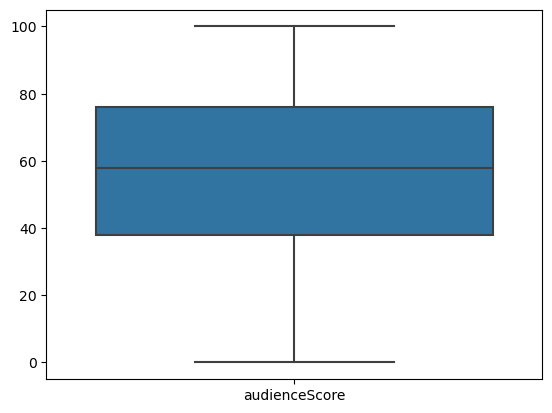

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(movies_t)
plt.show()

In [131]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


**Merging the Updated movies_t and train dataset using left join on column 'movieid'**

In [132]:
df_train_tr = pd.merge(train,movies_t,on='movieid',how='left')

In [133]:
df_train_tr

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,genre,director
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...","Comedy, Animation, Adventure, Fantasy",Bennie Basso
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,Action,Alma White
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",Drama,Bobby Oleary
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,17.0,NaN,NaN,NaN,Donald Page
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...","Crime, Drama",John Trent
...,...,...,...,...,...,...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE,The Joker Ethereal Captain Jack Sparrow Fantastic,NaN,NaN,NaN,Drama,Keith Flores
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,E.T. Hannibal Lecter Vito Corleone Katniss Eve...,20.0,PG-13,"['Crude and Sexual Content', 'Brief Strong Lan...","Comedy, Adventure",Susan Oley
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,Infinite Enigma Luke Skywalker,78.0,PG-13,"['Some Language', 'Suggestive References']","Comedy, Drama",Bryant Reams
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE,Emerald Oracle Iron Man Wolverine,39.0,NaN,NaN,"Kids & family, Holiday, Comedy",Lisa Cruz


**Merging the Updated movies_t and test dataset using left join on column 'movieid'**

In [134]:
df_test_tr = pd.merge(test,movies_t,on='movieid',how='left')

In [135]:
df_test_tr

,movieid,reviewerName,isTopCritic,reviewText,title,audienceScore,rating,ratingContents,genre,director
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...","Holiday, Horror, Mystery & thriller",Sara Barnett
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...,Terminator Katniss Everdeen Glimmer,86.0,PG,['Emotional Thematic Material'],"Drama, Adventure",Cindy Flander
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...,James Bond Labyrinth Gollum,62.0,NaN,NaN,Drama,Charlotte Bramble
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...,V Quest Han Solo Wondrous,NaN,NaN,NaN,NaN,Ricardo Youtsey
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...,Enigma Hulk Surreal Starlight,NaN,NaN,NaN,"Drama, Musical",Marvin Short
...,...,...,...,...,...,...,...,...,...,...
55310,celestial_radiant,Jose Mccormick,False,Ron Howard delivers an unconventional romantic...,Celestial Radiant,29.0,PG-13,"['Sexual Content', 'Mature Thematic Elements']",Comedy,Jill Fraser
55311,vivid_james_t._kirk,Thomas Osborne,False,As an oddball art film that openly invites you...,Vivid James T. Kirk,71.0,NaN,NaN,"Comedy, Drama, Fantasy",Daryl Wilson
55312,scarlett_o'hara_neo_scarlett_o'hara_infinite,Julie Kirby,False,Nicholson wears his devilish grin from his fir...,Scarlett O'Hara Neo Scarlett O'Hara Infinite,60.0,PG-13,"['Language', 'Crude Sexual Content']",Comedy,Maria Tejada
55313,terminator_epic_rocky_balboa_mystic,Tina Sutton,True,It's hard not be entertained by two dozen of C...,Terminator Epic Rocky Balboa Mystic,65.0,PG-13,['Sexual Content'],"Musical, Biography, Drama, Lgbtq+",Jermaine Fantasia


In [136]:
df_train_tr = df_train_tr.drop('reviewerName',axis=1)

In [137]:
df_test_tr = df_test_tr.drop('reviewerName',axis=1)

In [138]:
df_train_tr['sentiment'].value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

In [139]:
df_train_tr['genre'][df_train_tr['sentiment']=="POSITIVE"].value_counts()[:15]

Drama                                          17426
Documentary                                     8218
Comedy, Drama                                   6833
Comedy                                          6136
Mystery & thriller                              2877
Horror, Mystery & thriller                      2700
Romance, Comedy                                 2326
Crime, Drama                                    1891
Horror                                          1867
Mystery & thriller, Drama                       1415
Action, Mystery & thriller                      1344
Drama, Mystery & thriller                       1314
Kids & family, Comedy, Adventure, Animation     1261
History, Drama                                  1236
Drama, Romance                                  1217
Name: genre, dtype: int64

In [140]:
df_train_tr['director'].value_counts()

Joseph Brooks      1435
Billy Diaz          754
Linda Shuffler      547
Sheila Pereira      518
Michele Burton      514
                   ... 
Freda Hatt            1
Corinne Plumley       1
Brian Mora            1
Robert Vasquez        1
Tawanda Ballard       1
Name: director, Length: 9474, dtype: int64

In [141]:
df_train_tr['genre'][df_train_tr['director']=="Louise Bodrick"].value_counts()[:10]

Series([], Name: genre, dtype: int64)

In [142]:
na = np.where(pd.isna(df_train_tr['genre']))   #[train_tr['sentiment']=='POSITIVE'].value_counts()

In [143]:
na[0]



array([     3,    145,    150, ..., 162533, 162609, 162665])

In [144]:
pd.isna(df_train_tr['genre'][3])

True

In [145]:
df_train_tr['sentiment'].iloc[na].value_counts()

POSITIVE    1832
NEGATIVE     710
Name: sentiment, dtype: int64

In [146]:
df_train_tr['genre'] = np.where((df_train_tr["sentiment"] == "POSITIVE") & (pd.isna(df_train_tr['genre'])),'Drama',df_train_tr['genre'])

In [147]:
df_train_tr['genre'] = np.where((df_train_tr["sentiment"] == "NEGATIVE") & (pd.isna(df_train_tr['genre'])),'Action',df_train_tr['genre'])

In [148]:
df_train_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieid             162758 non-null  object 
 1   isFrequentReviewer  162758 non-null  bool   
 2   reviewText          156311 non-null  object 
 3   sentiment           162758 non-null  object 
 4   title               162758 non-null  object 
 5   audienceScore       150193 non-null  float64
 6   rating              99396 non-null   object 
 7   ratingContents      99396 non-null   object 
 8   genre               162758 non-null  object 
 9   director            162758 non-null  object 
dtypes: bool(1), float64(1), object(8)
memory usage: 16.6+ MB


In [149]:
df_test_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 0 to 55314
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movieid         55315 non-null  object 
 1   isTopCritic     55315 non-null  bool   
 2   reviewText      52805 non-null  object 
 3   title           55315 non-null  object 
 4   audienceScore   50592 non-null  float64
 5   rating          31074 non-null  object 
 6   ratingContents  31074 non-null  object 
 7   genre           54354 non-null  object 
 8   director        55315 non-null  object 
dtypes: bool(1), float64(1), object(7)
memory usage: 3.9+ MB


In [150]:
from sklearn.impute import SimpleImputer,KNNImputer #python packages for imputing the missing values

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [151]:
si_me = SimpleImputer(strategy='median')
si_mf = SimpleImputer(strategy='most_frequent')
knn = KNNImputer()

In [152]:
df_train_tr['reviewText'][1]

"With a cast that reads like the Vogue Oscar party guest list, Valentine's Day should have been can't-miss cinema instead of standard Hollywood schmaltz."

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer #python packages for feature extraction of textual data

In [154]:
si_mf.fit_transform(np.array(df_test_tr['genre']).reshape(1,-1))

array([['Holiday, Horror, Mystery & thriller', 'Drama, Adventure',
        'Drama', ..., 'Comedy', 'Musical, Biography, Drama, Lgbtq+',
        'Comedy']], dtype=object)

In [155]:
df_test_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 0 to 55314
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movieid         55315 non-null  object 
 1   isTopCritic     55315 non-null  bool   
 2   reviewText      52805 non-null  object 
 3   title           55315 non-null  object 
 4   audienceScore   50592 non-null  float64
 5   rating          31074 non-null  object 
 6   ratingContents  31074 non-null  object 
 7   genre           54354 non-null  object 
 8   director        55315 non-null  object 
dtypes: bool(1), float64(1), object(7)
memory usage: 3.9+ MB


In [156]:
df_test_tr["director"].value_counts()

Joseph Brooks      483
Billy Diaz         225
Linda Shuffler     168
Sheila Pereira     162
Michele Burton     150
                  ... 
Margaret Haney       1
Tina Russell         1
Nicholas Oboyle      1
Vicky Reiley         1
Neal Foster          1
Name: director, Length: 9475, dtype: int64

**Filling the missing values in the feature 'genre' based on the trend of directors**

In [157]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Joseph Brooks") & (pd.isna(df_test_tr['genre'])),'Drama',df_test_tr['genre'])

In [158]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Billy Diaz") & (pd.isna(df_test_tr['genre'])),'Comedy, Drama, Crime',df_test_tr['genre'])

In [159]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Sheila Pereira") & (pd.isna(df_test_tr['genre'])),'Sci-fi, Horror, Mystery & thriller',df_test_tr['genre'])

In [160]:
df_test_tr['director'][pd.isna(df_test_tr['genre'])].value_counts()[:10]

Augusta Daniel        65
Philip Contreras      27
Linda Proudfoot       19
Rodolfo Carter        18
Louise Bodrick        18
Brenda Erwin          16
Kristine Chatman      15
Donald Page           15
Catherine Bartholf    14
Russell Ellison       14
Name: director, dtype: int64

In [161]:
df_train_tr['genre'][df_train_tr['director']=="Kristine Chatman"].value_counts()[:10]

Drama     50
Action     5
Name: genre, dtype: int64

In [162]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Augusta Daniel") & (pd.isna(df_test_tr['genre'])),'Drama',df_test_tr['genre'])

In [163]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Philip Contreras") & (pd.isna(df_test_tr['genre'])),'Action',df_test_tr['genre'])

In [164]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Linda Proudfoot") & (pd.isna(df_test_tr['genre'])),'Action',df_test_tr['genre'])

In [165]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Rodolfo Carter") & (pd.isna(df_test_tr['genre'])),'Action',df_test_tr['genre'])

In [166]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Louise Bodrick") & (pd.isna(df_test_tr['genre'])),'Drama',df_test_tr['genre'])

In [167]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Brenda Erwin") & (pd.isna(df_test_tr['genre'])),'Action',df_test_tr['genre'])

In [168]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Donald Page") & (pd.isna(df_test_tr['genre'])),'Drama',df_test_tr['genre'])

In [169]:
df_test_tr['genre'] = np.where((df_test_tr["director"] == "Kristine Chatman") & (pd.isna(df_test_tr['genre'])),'Drama',df_test_tr['genre'])

In [170]:
df_test_tr['genre'] = np.where(pd.isna(df_test_tr['genre']),'Drama',df_test_tr['genre'])

In [171]:
df_test_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 0 to 55314
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movieid         55315 non-null  object 
 1   isTopCritic     55315 non-null  bool   
 2   reviewText      52805 non-null  object 
 3   title           55315 non-null  object 
 4   audienceScore   50592 non-null  float64
 5   rating          31074 non-null  object 
 6   ratingContents  31074 non-null  object 
 7   genre           55315 non-null  object 
 8   director        55315 non-null  object 
dtypes: bool(1), float64(1), object(7)
memory usage: 3.9+ MB


In [172]:
df_train_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieid             162758 non-null  object 
 1   isFrequentReviewer  162758 non-null  bool   
 2   reviewText          156311 non-null  object 
 3   sentiment           162758 non-null  object 
 4   title               162758 non-null  object 
 5   audienceScore       150193 non-null  float64
 6   rating              99396 non-null   object 
 7   ratingContents      99396 non-null   object 
 8   genre               162758 non-null  object 
 9   director            162758 non-null  object 
dtypes: bool(1), float64(1), object(8)
memory usage: 16.6+ MB


In [173]:
df_test_tr1 = df_test_tr.drop(['rating','ratingContents'],axis=1)
df_train_tr1 = df_train_tr.drop(['rating','ratingContents'],axis=1)


**Handling the missing values using Imputing Strategies**

In [174]:
from sklearn.impute import SimpleImputer, KNNImputer
si_mf = SimpleImputer(strategy='most_frequent')
si_me = SimpleImputer(strategy='median')
knn = KNNImputer()

In [175]:
df_train_tr1['audienceScore'] = knn.fit_transform(df_train_tr1[['audienceScore']])

In [176]:
df_test_tr1['audienceScore'] = knn.transform(df_test_tr1[['audienceScore']])

In [177]:
df_train_tr1['reviewText'] = si_mf.fit_transform(df_train_tr1[['reviewText']])
df_test_tr1['reviewText'] = si_mf.transform(df_test_tr1[['reviewText']])

In [178]:
df_test_tr2 = df_test_tr1.drop(["title",'director'],axis=1)
df_train_tr2 = df_train_tr1.drop(["title",'director'],axis=1)

In [179]:
df_test_tr2

,movieid,isTopCritic,reviewText,audienceScore,genre
0,legend_marty_mcfly_oracle,False,Green slowly cranks up the dread with style an...,57.000000,"Holiday, Horror, Mystery & thriller"
1,terminator_katniss_everdeen_glimmer,False,Philip Noyce's direction is elegant and unforc...,86.000000,"Drama, Adventure"
2,james_bond_labyrinth_gollum,False,It wouldn't do to say what path Maria ultimate...,62.000000,Drama
3,v_quest_han_solo_wondrous,False,Pig is not exactly the arthouse John Wick that...,65.015726,Drama
4,enigma_hulk_surreal_starlight,False,An imaginative no-budget musical of sorts abou...,65.015726,"Drama, Musical"
...,...,...,...,...,...
55310,celestial_radiant,False,Ron Howard delivers an unconventional romantic...,29.000000,Comedy
55311,vivid_james_t._kirk,False,As an oddball art film that openly invites you...,71.000000,"Comedy, Drama, Fantasy"
55312,scarlett_o'hara_neo_scarlett_o'hara_infinite,False,Nicholson wears his devilish grin from his fir...,60.000000,Comedy
55313,terminator_epic_rocky_balboa_mystic,True,It's hard not be entertained by two dozen of C...,65.000000,"Musical, Biography, Drama, Lgbtq+"


In [180]:
df_train_tr2

,movieid,isFrequentReviewer,reviewText,sentiment,audienceScore,genre
0,marvelous_pirate,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,65.000000,"Comedy, Animation, Adventure, Fantasy"
1,tony_montana_frodo_baggins_v_rocky_balboa,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,65.015726,Action
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,True,Creed II does not give us anything but another...,POSITIVE,80.000000,Drama
3,lara_croft_glimmer,False,"I know what you're thinking, but this is no Li...",POSITIVE,17.000000,Drama
4,jason_bourne_surreal_the_terminator_indiana_jones,False,Director Fernando Meirelles tells the story wi...,POSITIVE,97.000000,"Crime, Drama"
...,...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,False,A top-notch thriller with genuine surprises an...,POSITIVE,65.015726,Drama
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,20.000000,"Comedy, Adventure"
162755,infinite_enigma_luke_skywalker,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,78.000000,"Comedy, Drama"
162756,emerald_oracle_iron_man_wolverine,False,"The film is rescued by a strong third act, but...",NEGATIVE,39.000000,"Kids & family, Holiday, Comedy"


**Handling the Categorical Values**

In [181]:
df_train_tr2['isFrequentReviewer'] = np.where(df_train_tr2['isFrequentReviewer']==False,0,1)
df_test_tr2['isTopCritic'] = np.where(df_test_tr2['isTopCritic']==False,0,1)


In [182]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [183]:
minmax = MinMaxScaler()
tfidf = TfidfVectorizer()
count_vec = CountVectorizer()

**Scaling the Data**

In [184]:
df_train_tr2['audienceScore'] = minmax.fit_transform(df_train_tr2[['audienceScore']])

In [185]:
df_test_tr2['audienceScore'] = minmax.fit_transform(df_test_tr2[['audienceScore']])

In [186]:
ck = list(i[0] for i in np.array(df_train_tr2[['genre']]))

In [187]:
ck

['Comedy, Animation, Adventure, Fantasy',
 'Action',
 'Drama',
 'Drama',
 'Crime, Drama',
 'Comedy, Drama',
 'Comedy, Drama',
 'Kids & family, Comedy, Animation',
 'Comedy',
 'Comedy, Drama',
 'Kids & family, Comedy',
 'Documentary',
 'Documentary, Music',
 'Action, Adventure, History, Drama',
 'Drama, Romance',
 'Comedy, Drama',
 'Kids & family, Sci-fi, Adventure, Comedy',
 'Drama',
 'Biography, History, Drama, Lgbtq+',
 'Action, Mystery & thriller',
 'Kids & family, Comedy, Adventure, Animation',
 'Adventure',
 'Comedy',
 'Drama',
 'Drama, Lgbtq+',
 'Mystery & thriller',
 'Action, Adventure, Fantasy, Sci-fi',
 'Mystery & thriller',
 'Fantasy, Adventure, Action, Mystery & thriller, Drama',
 'Horror, Drama',
 'Biography, Comedy, Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Documentary',
 'Crime, Drama',
 'Comedy',
 'Drama, Mystery & thriller',
 'Crime, Drama, Mystery & thriller, Animation',
 'Comedy, Horror, Mystery & thriller',
 'Comedy, Drama',
 'Documentary',
 'Documentary',
 'Documenta

In [188]:
ck1 = count_vec.fit_transform(ck)

In [189]:
y = df_train_tr1['sentiment']

In [190]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)

In [191]:
ck1

<162758x40 sparse matrix of type '<class 'numpy.int64'>'
	with 377204 stored elements in Compressed Sparse Row format>

In [192]:
df_train_tr2

,movieid,isFrequentReviewer,reviewText,sentiment,audienceScore,genre
0,marvelous_pirate,0,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,0.650000,"Comedy, Animation, Adventure, Fantasy"
1,tony_montana_frodo_baggins_v_rocky_balboa,0,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,0.650157,Action
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,1,Creed II does not give us anything but another...,POSITIVE,0.800000,Drama
3,lara_croft_glimmer,0,"I know what you're thinking, but this is no Li...",POSITIVE,0.170000,Drama
4,jason_bourne_surreal_the_terminator_indiana_jones,0,Director Fernando Meirelles tells the story wi...,POSITIVE,0.970000,"Crime, Drama"
...,...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,0,A top-notch thriller with genuine surprises an...,POSITIVE,0.650157,Drama
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,1,Some people find Derek Zoolander funny and lik...,NEGATIVE,0.200000,"Comedy, Adventure"
162755,infinite_enigma_luke_skywalker,0,"This fun, gentle comedy focuses mainly on them...",POSITIVE,0.780000,"Comedy, Drama"
162756,emerald_oracle_iron_man_wolverine,0,"The film is rescued by a strong third act, but...",NEGATIVE,0.390000,"Kids & family, Holiday, Comedy"


In [193]:
y_train_1 = df_train_tr2['sentiment']

In [194]:
y_train_2 = np.where(y_train_1=='POSITIVE',1,0) #final test data to be used for determing the accuracy

In [195]:
x_tra = df_train_tr2.drop('sentiment',axis=1)

In [196]:
df_test_tr2

,movieid,isTopCritic,reviewText,audienceScore,genre
0,legend_marty_mcfly_oracle,0,Green slowly cranks up the dread with style an...,0.570000,"Holiday, Horror, Mystery & thriller"
1,terminator_katniss_everdeen_glimmer,0,Philip Noyce's direction is elegant and unforc...,0.860000,"Drama, Adventure"
2,james_bond_labyrinth_gollum,0,It wouldn't do to say what path Maria ultimate...,0.620000,Drama
3,v_quest_han_solo_wondrous,0,Pig is not exactly the arthouse John Wick that...,0.650157,Drama
4,enigma_hulk_surreal_starlight,0,An imaginative no-budget musical of sorts abou...,0.650157,"Drama, Musical"
...,...,...,...,...,...
55310,celestial_radiant,0,Ron Howard delivers an unconventional romantic...,0.290000,Comedy
55311,vivid_james_t._kirk,0,As an oddball art film that openly invites you...,0.710000,"Comedy, Drama, Fantasy"
55312,scarlett_o'hara_neo_scarlett_o'hara_infinite,0,Nicholson wears his devilish grin from his fir...,0.600000,Comedy
55313,terminator_epic_rocky_balboa_mystic,1,It's hard not be entertained by two dozen of C...,0.650000,"Musical, Biography, Drama, Lgbtq+"


In [197]:
x_tra

,movieid,isFrequentReviewer,reviewText,audienceScore,genre
0,marvelous_pirate,0,Henry Selick’s first movie since 2009’s Corali...,0.650000,"Comedy, Animation, Adventure, Fantasy"
1,tony_montana_frodo_baggins_v_rocky_balboa,0,With a cast that reads like the Vogue Oscar pa...,0.650157,Action
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,1,Creed II does not give us anything but another...,0.800000,Drama
3,lara_croft_glimmer,0,"I know what you're thinking, but this is no Li...",0.170000,Drama
4,jason_bourne_surreal_the_terminator_indiana_jones,0,Director Fernando Meirelles tells the story wi...,0.970000,"Crime, Drama"
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,0,A top-notch thriller with genuine surprises an...,0.650157,Drama
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,1,Some people find Derek Zoolander funny and lik...,0.200000,"Comedy, Adventure"
162755,infinite_enigma_luke_skywalker,0,"This fun, gentle comedy focuses mainly on them...",0.780000,"Comedy, Drama"
162756,emerald_oracle_iron_man_wolverine,0,"The film is rescued by a strong third act, but...",0.390000,"Kids & family, Holiday, Comedy"


Making the features 'IsTopCritic' and 'IsFrequentReviewer' same

In [198]:
x_tra.rename(columns = {'isFrequentReviewer':'isTopCritic'}, inplace = True)

In [199]:
x_tra

,movieid,isTopCritic,reviewText,audienceScore,genre
0,marvelous_pirate,0,Henry Selick’s first movie since 2009’s Corali...,0.650000,"Comedy, Animation, Adventure, Fantasy"
1,tony_montana_frodo_baggins_v_rocky_balboa,0,With a cast that reads like the Vogue Oscar pa...,0.650157,Action
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,1,Creed II does not give us anything but another...,0.800000,Drama
3,lara_croft_glimmer,0,"I know what you're thinking, but this is no Li...",0.170000,Drama
4,jason_bourne_surreal_the_terminator_indiana_jones,0,Director Fernando Meirelles tells the story wi...,0.970000,"Crime, Drama"
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,0,A top-notch thriller with genuine surprises an...,0.650157,Drama
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,1,Some people find Derek Zoolander funny and lik...,0.200000,"Comedy, Adventure"
162755,infinite_enigma_luke_skywalker,0,"This fun, gentle comedy focuses mainly on them...",0.780000,"Comedy, Drama"
162756,emerald_oracle_iron_man_wolverine,0,"The film is rescued by a strong third act, but...",0.390000,"Kids & family, Holiday, Comedy"


In [200]:
x_tra.shape

(162758, 5)

In [201]:
df_test_tr2.shape

(55315, 5)

In [202]:
x_tra.shape[0]+df_test_tr2.shape[0]

218073

In [203]:
data_df = pd.concat([x_tra,df_test_tr2],axis=0)

In [204]:
x_tra.reset_index(inplace=True)

In [205]:
df_test_tr2.reset_index(inplace=True)

In [206]:
df_test_tr2 = df_test_tr2.drop('index',axis=1)

In [207]:
x_tra = x_tra.drop('index',axis=1)

In [208]:
x_tra.iloc[0]

movieid                                           marvelous_pirate
isTopCritic                                                      0
reviewText       Henry Selick’s first movie since 2009’s Corali...
audienceScore                                                 0.65
genre                        Comedy, Animation, Adventure, Fantasy
Name: 0, dtype: object

In [209]:
data_df

,movieid,isTopCritic,reviewText,audienceScore,genre
0,marvelous_pirate,0,Henry Selick’s first movie since 2009’s Corali...,0.650000,"Comedy, Animation, Adventure, Fantasy"
1,tony_montana_frodo_baggins_v_rocky_balboa,0,With a cast that reads like the Vogue Oscar pa...,0.650157,Action
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,1,Creed II does not give us anything but another...,0.800000,Drama
3,lara_croft_glimmer,0,"I know what you're thinking, but this is no Li...",0.170000,Drama
4,jason_bourne_surreal_the_terminator_indiana_jones,0,Director Fernando Meirelles tells the story wi...,0.970000,"Crime, Drama"
...,...,...,...,...,...
55310,celestial_radiant,0,Ron Howard delivers an unconventional romantic...,0.290000,Comedy
55311,vivid_james_t._kirk,0,As an oddball art film that openly invites you...,0.710000,"Comedy, Drama, Fantasy"
55312,scarlett_o'hara_neo_scarlett_o'hara_infinite,0,Nicholson wears his devilish grin from his fir...,0.600000,Comedy
55313,terminator_epic_rocky_balboa_mystic,1,It's hard not be entertained by two dozen of C...,0.650000,"Musical, Biography, Drama, Lgbtq+"


**Making a single column in the dataset containing the values of all the important features for feature extration**

In [210]:
data_df['f'] = data_df.apply(lambda x: str(x['isTopCritic'])+","+str(x['reviewText'])+","+str(x['genre']), axis=1)

In [211]:
data_df

,movieid,isTopCritic,reviewText,audienceScore,genre,f
0,marvelous_pirate,0,Henry Selick’s first movie since 2009’s Corali...,0.650000,"Comedy, Animation, Adventure, Fantasy","0,Henry Selick’s first movie since 2009’s Cora..."
1,tony_montana_frodo_baggins_v_rocky_balboa,0,With a cast that reads like the Vogue Oscar pa...,0.650157,Action,"0,With a cast that reads like the Vogue Oscar ..."
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,1,Creed II does not give us anything but another...,0.800000,Drama,"1,Creed II does not give us anything but anoth..."
3,lara_croft_glimmer,0,"I know what you're thinking, but this is no Li...",0.170000,Drama,"0,I know what you're thinking, but this is no ..."
4,jason_bourne_surreal_the_terminator_indiana_jones,0,Director Fernando Meirelles tells the story wi...,0.970000,"Crime, Drama","0,Director Fernando Meirelles tells the story ..."
...,...,...,...,...,...,...
55310,celestial_radiant,0,Ron Howard delivers an unconventional romantic...,0.290000,Comedy,"0,Ron Howard delivers an unconventional romant..."
55311,vivid_james_t._kirk,0,As an oddball art film that openly invites you...,0.710000,"Comedy, Drama, Fantasy","0,As an oddball art film that openly invites y..."
55312,scarlett_o'hara_neo_scarlett_o'hara_infinite,0,Nicholson wears his devilish grin from his fir...,0.600000,Comedy,"0,Nicholson wears his devilish grin from his f..."
55313,terminator_epic_rocky_balboa_mystic,1,It's hard not be entertained by two dozen of C...,0.650000,"Musical, Biography, Drama, Lgbtq+","1,It's hard not be entertained by two dozen of..."


In [212]:
x_train_combine = data_df['f'] #dataset containg the combined column for feature extraction

In [213]:
x_train_tr = x_train_combine[:162758] #separating the training data

In [214]:
x_train_tr

0         0,Henry Selick’s first movie since 2009’s Cora...
1         0,With a cast that reads like the Vogue Oscar ...
2         1,Creed II does not give us anything but anoth...
3         0,I know what you're thinking, but this is no ...
4         0,Director Fernando Meirelles tells the story ...
                                ...                        
162753    0,A top-notch thriller with genuine surprises ...
162754    1,Some people find Derek Zoolander funny and l...
162755    0,This fun, gentle comedy focuses mainly on th...
162756    0,The film is rescued by a strong third act, b...
162757    0,A peerless exercise in stimulus response.,Ho...
Name: f, Length: 162758, dtype: object

In [215]:
x_test_tr = x_train_combine[162758:] #separating the test data

In [216]:
x_test_tr

0        0,Green slowly cranks up the dread with style ...
1        0,Philip Noyce's direction is elegant and unfo...
2        0,It wouldn't do to say what path Maria ultima...
3        0,Pig is not exactly the arthouse John Wick th...
4        0,An imaginative no-budget musical of sorts ab...
                               ...                        
55310    0,Ron Howard delivers an unconventional romant...
55311    0,As an oddball art film that openly invites y...
55312    0,Nicholson wears his devilish grin from his f...
55313    1,It's hard not be entertained by two dozen of...
55314    1,Not clever enough for Smith fans, not gross ...
Name: f, Length: 55315, dtype: object

In [217]:
x_combine_tr = pd.concat([x_train_tr,x_test_tr],axis=0)

In [218]:
x_combine_tr

0        0,Henry Selick’s first movie since 2009’s Cora...
1        0,With a cast that reads like the Vogue Oscar ...
2        1,Creed II does not give us anything but anoth...
3        0,I know what you're thinking, but this is no ...
4        0,Director Fernando Meirelles tells the story ...
                               ...                        
55310    0,Ron Howard delivers an unconventional romant...
55311    0,As an oddball art film that openly invites y...
55312    0,Nicholson wears his devilish grin from his f...
55313    1,It's hard not be entertained by two dozen of...
55314    1,Not clever enough for Smith fans, not gross ...
Name: f, Length: 218073, dtype: object

In [219]:
x_combine_tr[21800]

21800    0,Grotesque and problematic, but gets the thum...
21800    1,When the all-important moment of catharsis t...
Name: f, dtype: object

In [220]:
x_all_untr_lower = x_combine_tr.map(lambda s:s.lower() if type(s) == str else s)

In [221]:
x_all_untr_lower

0        0,henry selick’s first movie since 2009’s cora...
1        0,with a cast that reads like the vogue oscar ...
2        1,creed ii does not give us anything but anoth...
3        0,i know what you're thinking, but this is no ...
4        0,director fernando meirelles tells the story ...
                               ...                        
55310    0,ron howard delivers an unconventional romant...
55311    0,as an oddball art film that openly invites y...
55312    0,nicholson wears his devilish grin from his f...
55313    1,it's hard not be entertained by two dozen of...
55314    1,not clever enough for smith fans, not gross ...
Name: f, Length: 218073, dtype: object

In [222]:
x_all_untr_sw = x_all_untr_lower.str.replace(r'\b(a|an|the)\b', '', regex=True)

In [223]:
x_all_untr_sw

0        0,henry selick’s first movie since 2009’s cora...
1        0,with  cast that reads like  vogue oscar part...
2        1,creed ii does not give us anything but anoth...
3        0,i know what you're thinking, but this is no ...
4        0,director fernando meirelles tells  story wit...
                               ...                        
55310    0,ron howard delivers  unconventional romantic...
55311    0,as  oddball art film that openly invites you...
55312    0,nicholson wears his devilish grin from his f...
55313    1,it's hard not be entertained by two dozen of...
55314    1,not clever enough for smith fans, not gross ...
Name: f, Length: 218073, dtype: object

In [224]:
x_all_untr_sw

0        0,henry selick’s first movie since 2009’s cora...
1        0,with  cast that reads like  vogue oscar part...
2        1,creed ii does not give us anything but anoth...
3        0,i know what you're thinking, but this is no ...
4        0,director fernando meirelles tells  story wit...
                               ...                        
55310    0,ron howard delivers  unconventional romantic...
55311    0,as  oddball art film that openly invites you...
55312    0,nicholson wears his devilish grin from his f...
55313    1,it's hard not be entertained by two dozen of...
55314    1,not clever enough for smith fans, not gross ...
Name: f, Length: 218073, dtype: object

In [225]:
for i in range(len(x_test_tr)):
    x_test_tr[i] = x_test_tr[i].replace(","," ")

In [226]:
x_test_tr

0        0 Green slowly cranks up the dread with style ...
1        0 Philip Noyce's direction is elegant and unfo...
2        0 It wouldn't do to say what path Maria ultima...
3        0 Pig is not exactly the arthouse John Wick th...
4        0 An imaginative no-budget musical of sorts ab...
                               ...                        
55310    0 Ron Howard delivers an unconventional romant...
55311    0 As an oddball art film that openly invites y...
55312    0 Nicholson wears his devilish grin from his f...
55313    1 It's hard not be entertained by two dozen of...
55314    1 Not clever enough for Smith fans  not gross ...
Name: f, Length: 55315, dtype: object

In [227]:
x_train_combine[0]

0    0,Henry Selick’s first movie since 2009’s Cora...
0    0 Green slowly cranks up the dread with style ...
Name: f, dtype: object

In [228]:
#for i in range(len(x_train_all)):
 #    x_train_all[i] = x_train_all[i].replace(","," ")
#len(x_train_all)

**Applying the featture engineering & extraction**

In [229]:
x_train_c_vec_combine = count_vec.fit_transform(x_all_untr_sw)

In [230]:
x_train_c_vec_combine

<218073x72860 sparse matrix of type '<class 'numpy.int64'>'
	with 4452323 stored elements in Compressed Sparse Row format>

In [231]:
x_train_combine_tr = x_train_c_vec_combine[:162758]

In [232]:
x_test_combine_tr = x_train_c_vec_combine[162758:]

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier

Splitting the dataset

In [234]:
x_train,x_test,y_train,y_test = train_test_split(x_train_combine_tr,y_train_2,test_size=0.15,random_state=42)

In [235]:
y_train

array([1, 0, 1, ..., 1, 1, 1])

In [236]:
from sklearn.metrics import f1_score

**Applying the different classifier models**

In [237]:
#model1 = RandomForestClassifier()
#model1.fit(x_train,y_train)
#y_model1 = model1.predict(x_test)
#score1 = f1_score(y_test, y_model1)
#score1

In [238]:
#y_model2 = model1.predict(x_test_combine_tr)

In [239]:
#y_model1.shape

In [240]:
x_test.shape

(24414, 72860)

In [241]:
from sklearn.linear_model import Perceptron,SGDClassifier

In [242]:
model3 = SGDClassifier()
model3.fit(x_train,y_train)
y_model3 = model3.predict(x_test)
score3 = f1_score(y_test,y_model3)
score3

0.8596353485126057

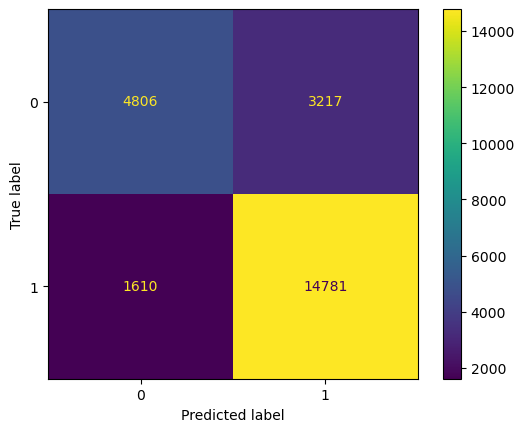

In [244]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
cf_display = ConfusionMatrixDisplay.from_predictions(y_test,y_model3)
plt.show()

In [245]:
cr = classification_report(y_test,y_model3)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67      8023
           1       0.82      0.90      0.86     16391

    accuracy                           0.80     24414
   macro avg       0.79      0.75      0.76     24414
weighted avg       0.80      0.80      0.80     24414



In [ ]:
y_model3 = model3.predict(x_test_combine_tr)

In [ ]:
#model15 = SGDClassifier()
#model15.fit(x_train_combine_tr,y_train_2)
#y_model15 = model15.predict(x_test_combine_tr)


In [ ]:
#y_model_reg = np.where(y_model_reg==1,'POSITIVE','NEGATIVE')

In [252]:
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=1000)
svc.fit(x_train,y_train)
y_model_svc = svc.predict(x_test)
score_svc = f1_score(y_test,y_model_svc)
score_svc

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8411555582110954

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#model4 = SGDClassifier(penalty='elasticnet', alpha=0.01, learning_rate='adaptive', eta0=0.01)
#model4.fit(x_train,y_train)
#y_model4 = model4.predict(x_test)
#score4 = f1_score(y_test,y_model4)
#score4

In [ ]:
#model5 = GradientBoostingClassifier()
#model5.fit(x_train,y_train)
#y_model5 = model5.predict(x_test)
#score5 = f1_score(y_test, y_model5)
#score5

In [ ]:
#import xgboost as xgb
#model6 = xgb.XGBClassifier()
#model6.fit(x_train,y_train)
#y_model6 = model6.predict(x_test)
#score6 = f1_score(y_test, y_model6)
#score6

In [ ]:
#from catboost import CatBoostClassifier
#cat_model = CatBoostClassifier(verbose=0)
#cat_model.fit(x_train,y_train)
#y_cat_model = cat_model.predict(x_test)
#score_cat_model = f1_score(y_test, y_cat_model)
#score_cat_model

In [ ]:
#from sklearn.neural_network import MLPClassifier
#model8 = MLPClassifier()
#model8.fit(x_train,y_train)
#y_model8 = model8.predict(x_test)
#score8 = f1_score(y_test, y_model8)
#score8

In [247]:
from sklearn.linear_model import LogisticRegression

In [248]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#log_model = LogisticRegression(max_iter=10000)
#tuned_parameters = [{'C': [0.001,0.01,0.1,1],
#                     'penalty':['l2','l1'],
#                    'solver' : ['liblinear','saga']}]
#grid_log = GridSearchCV(log_model, tuned_parameters, cv=3, scoring="accuracy")
#grid_log.fit(x_train_combine_tr,y_train_22)

In [249]:
log_reg = LogisticRegression(max_iter=10000, C=0.1, solver='saga', penalty='l2')
log_reg.fit(x_train,y_train)

LogisticRegression(C=0.1, max_iter=10000, solver='saga')

In [250]:
y_model_reg = log_reg.predict(x_test)
score_reg = f1_score(y_test, y_model_reg)
score_reg


0.8593989529401557

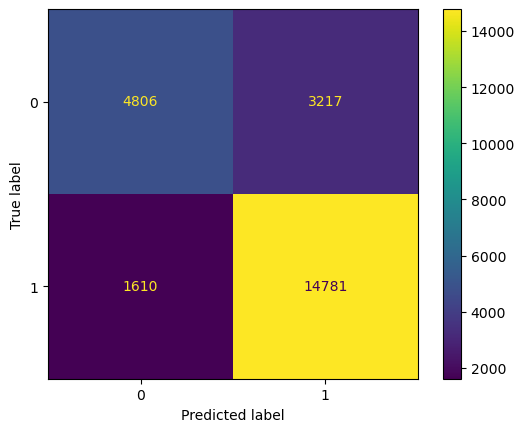

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      8023
           1       0.82      0.91      0.86     16391

    accuracy                           0.80     24414
   macro avg       0.79      0.75      0.76     24414
weighted avg       0.80      0.80      0.79     24414



In [251]:
cf_display = ConfusionMatrixDisplay.from_predictions(y_test,y_model3)
plt.show()
print(classification_report(y_test,y_model_reg))

In [ ]:
#model14 = StackingClassifier(estimators=[('log',log_reg),('cat',cat_model)], final_estimator=SGDClassifier())

In [ ]:
#model14.fit(x_train,y_train)

In [ ]:
#y_model14 = model14.predict(x_test)
#score14 = f1_score(y_test, y_model14)
#score14

In [ ]:
#log_reg = LogisticRegression(max_iter=10000, solver='liblinear', penalty='l1')
#log_reg.fit(x_train_all_tr,y_train2)
#y_log_reg = log_reg.predict(x_test)
#score_reg = f1_score(y_test, y_log_reg)
#score_reg

In [ ]:
#y_model_reg = log_reg.predict(x_test_all_tr)

In [ ]:
#model11 = LogisticRegression()
#model11.fit(x_train,y_train)
#y_model11 = model11.predict(x_test)
#score11 = f1_score(y_test, y_model11)
#score11

In [ ]:
#from sklearn.ensemble import VotingClassifier

In [ ]:
#model13=VotingClassifier(estimators=[('sgd',model4),('log',model11),('cat',cat_model)])
#model13.fit(x_train_combine_tr,y_train_2)

In [ ]:
#y_model13 = model13.predict(x_test_all_tr)


In [ ]:
#model14=VotingClassifier(estimators=[('sgd',model4),('log',model11),('cat',cat_model)])
#model14.fit(x_train,y_train)
#y_model14 = model14.predict(x_test)
#score14 = f1_score(y_test,y_model14)
#score14

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
#param_grid = {
 #   'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
 #     'penalty': ['none', 'l2', 'l1', 'elasticnet'],
 #   'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 #   'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
 #   'eta0': [0.1, 0.01, 0.001, 0.0001]
#}
#grid_model = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, scoring='accuracy')
#grid_model.fit(x_train,y_train)


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#sgd = SGDClassifier()
#param_grid = {
#    'loss': ['hinge', 'log_loss'],
#    'penalty': ['l2', 'l1', 'elasticnet'],
#    'alpha': [0.0001, 0.001, 0.01, 0.1],
#    'eta0': [0.1, 0.01, 0.001, 0.0001]
#}
#grid_model = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=3, scoring='accuracy')
#grid_model.fit(x_train,y_train)

In [ ]:
#best_sgd = SGDClassifier(**grid_model.best_params_)
#model9 = best_sgd.fit(x_train, y_train)
#y_model_grid = model9.predict(x_test)
#score_grid = f1_score(y_test,y_model_reg)
#score_grid

In [ ]:
#from sklearn.linear_model import LogisticRegressionCV
#logreg = LogisticRegressionCV(cv=3, random_state=0)
#param_grid = {
#    'Cs': [0.001, 0.01, 0.1],
#    'penalty': ['l1', 'l2'],
#    'solver': ['liblinear', 'saga']
#}
#grid_search_log = GridSearchCV(logreg, param_grid, cv=5)
#grid_search_log.fit(x_train, y_train)

In [ ]:
#best_logreg = LogisticRegressionCV(**grid_search_log.best_params_)
#best_logreg.fit(x_train,y_train)
#y_model_logreg = best_logreg.predict(x_test)
#score = f1_Score(y_test, y_model_logreg)
#score

**Making the Submission**

In [ ]:
y_model3 = np.where(y_model3==1,'POSITIVE','NEGATIVE')

In [ ]:
submission = pd.DataFrame(columns=["id","sentiment"])
submission['id']=[i for i in range(len(y_model3))]
submission["sentiment"] = y_model3
submission.to_csv("/kaggle/working/submission.csv",index=False)

In [ ]:
#submission